RUGBY PASS

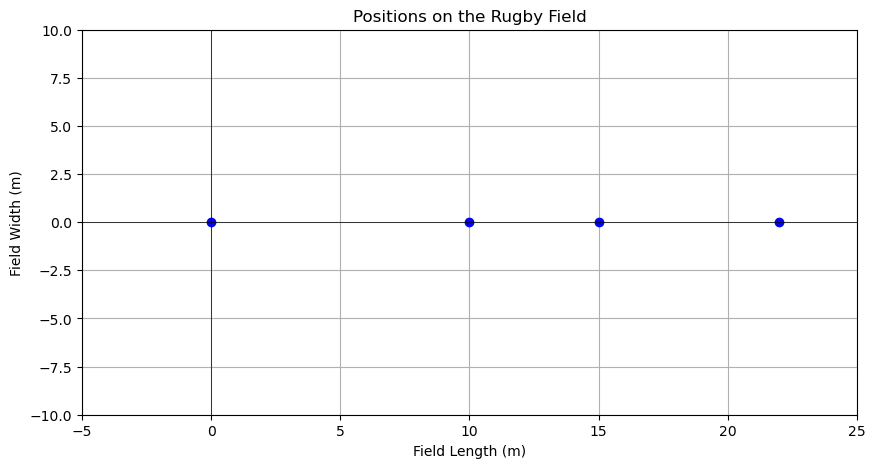

In [21]:
#import numpy for numerical operations
#import cmath for complex number operations
#import matplotlib for plotting (not used in this snippet)
import numpy as np
import cmath

# Positions initiales (ligne médiane = axe réel)
Z1, Z2, Z3, Z4 = 15+0j, 0+0j, 10+0j, 22+0j

# create a plot to visualize the position on the field
plot_field = True
if plot_field:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot([Z1.real, Z2.real, Z3.real, Z4.real], [Z1.imag, Z2.imag, Z3.imag, Z4.imag], 'bo')
    plt.xlim(-5, 25)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('Positions on the Rugby Field')
    plt.xlabel('Field Length (m)')
    plt.ylabel('Field Width (m)')
    plt.grid()
    plt.show()

ROTATION

Inside centre z1' : (19.48557158514987+11.249999999999998j)
Fly-half z2' (pivot) : 0j
Outside centre z3' : (12.99038105676658+7.499999999999999j)
Winger z4' : (28.578838324886476+16.499999999999996j)
New positions after rotation:
Z1: (19.48557158514987+11.249999999999998j)
Z3: (12.99038105676658+7.499999999999999j)
Z4: (28.578838324886476+16.499999999999996j)


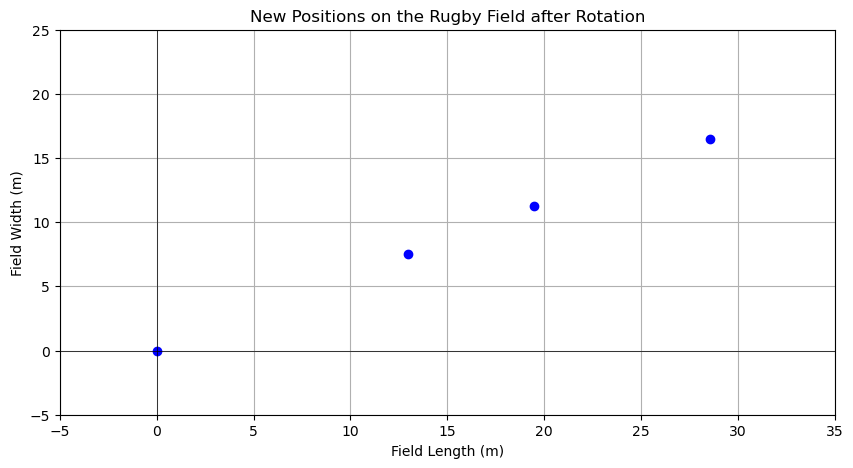

In [22]:
angle = np.pi/6
a = 1.5 * cmath.exp(1j * angle)

# transformation : rotation + dilatation autour de z2
def tip_and_overs(z, z2=Z2):
    return z2 + a * (z - z2)

# nouvelles positions
Z1p, Z2p, Z3p, Z4p = tip_and_overs(Z1), tip_and_overs(Z2), tip_and_overs(Z3), tip_and_overs(Z4)

print("Inside centre z1' :", Z1p)
print("Fly-half z2' (pivot) :", Z2p)
print("Outside centre z3' :", Z3p)
print("Winger z4' :", Z4p)
# Affichage des nouvelles positions
print(f"New positions after rotation:\nZ1: {Z1p}\nZ3: {Z3p}\nZ4: {Z4p}")
plot_field = True
if plot_field:
    plt.figure(figsize=(10, 5))
    plt.plot([Z1p.real, Z2p.real, Z3p.real, Z4p.real], 
             [Z1p.imag, Z2p.imag, Z3p.imag, Z4p.imag], 'bo')
    plt.xlim(-5, 35)
    plt.ylim(-5, 25)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('New Positions on the Rugby Field after Rotation')
    plt.xlabel('Field Length (m)')
    plt.ylabel('Field Width (m)')
    plt.grid()
    plt.show()

Defender position W: (12+6j)


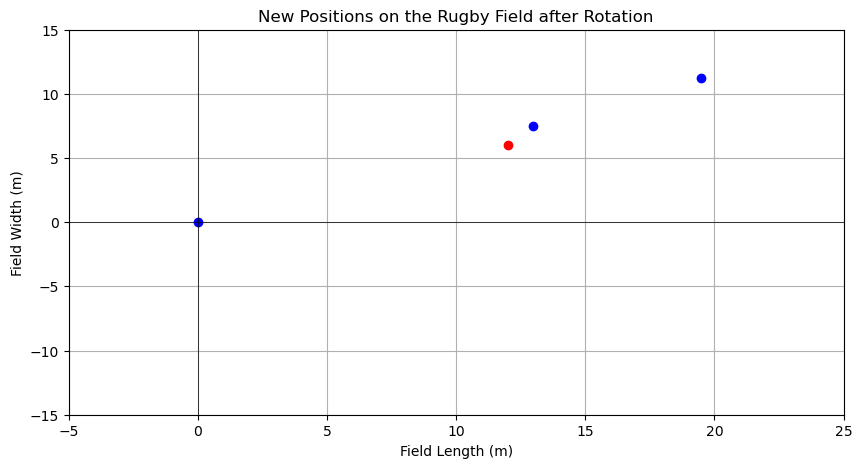

In [23]:
#add a defender at position 𝑤 = 12 + 6𝑖.
W = 12 + 6j
#afficher la position du défenseur
print("Defender position W:", W)
plot_field = True
if plot_field:
    plt.figure(figsize=(10, 5))
    plt.plot([Z1p.real, Z2.real, Z3p.real, Z4p.real], 
             [Z1p.imag, Z2.imag, Z3p.imag, Z4p.imag], 'bo')
    plt.plot(W.real, W.imag, 'ro')  # plot defender in red
    plt.xlim(-5, 25)
    plt.ylim(-15, 15)
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.title('New Positions on the Rugby Field after Rotation')
    plt.xlabel('Field Length (m)')
    plt.ylabel('Field Width (m)')
    plt.grid()
    plt.show()

In [24]:
#add a function to check if a player can pass the ball without interception
def can_pass_without_interception(Z_from, Z_to, W, r=3):
    # Segment from Z2p to Z3p (passer to receiver)
    A, B, P = complex(Z_from), complex(Z_to), complex(W)
    AB = B - A
    AP = P - A
    if AB == 0:
        return abs(AP) > r  # A and B are the same point
    
    # Project point P onto line AB, computing parameterized position d(t) = A + t * (B - A)
    t = np.dot(AP, AB) / np.dot(AB, AB)
    t = max(0, min(1, t))  # Clamp t to the segment [0, 1]
    closest_point = A + t * AB
    distance = abs(P - closest_point)
    return distance > r  # True if pass is safe, False if intercepted

#check if the pass from Z2p to Z3p can be intercepted by W
pass_safe = can_pass_without_interception(Z2p, Z3p, W)
print("Can the pass from Z2' to Z3' be made without interception by W?", pass_safe)


Can the pass from Z2' to Z3' be made without interception by W? False


In [25]:
def can_pass_without_interception(Z_from, Z_to, W, r=3):
    """
    Check if W can intercept a pass from  Z_from to Z_to.
    Retourne True si la passe évite le cercle de rayon r.
    """
    A, B, P = complex(Z_from), complex(Z_to), complex(W)
    AB = B - A
    AP = P - A
    if AB == 0:
        return abs(AP) >= r  # cas dégénéré

    # projection scalaire t
    t = (AP.conjugate() * AB).real / (AB.conjugate() * AB).real
    t_clamped = max(0.0, min(1.0, t))
    closest = A + t_clamped * AB
    dist = abs(P - closest)

    return dist >= r

# utiliser les positions après reshape
can_pass = can_pass_without_interception(Z2p, Z3p, W)
print("Can the fly-half pass to the outside centre without interception?", can_pass)


Can the fly-half pass to the outside centre without interception? False
